In [67]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [68]:
retail=pd.read_excel('Online Retail.xlsx')

In [69]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [70]:
retail.shape

(541909, 8)

In [71]:
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [72]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [73]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [74]:
(retail.select_dtypes(include=['number']) < 0).sum()


Quantity      10624
UnitPrice         2
CustomerID        0
dtype: int64

In [75]:
retail[(retail['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [76]:
retail[(retail['UnitPrice']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [77]:
retail=retail[(retail['Quantity']>0) & (retail['UnitPrice']>0)]

We removed rows where `Quantity` or `UnitPrice` is zero or negative. These usually mean returns or errors and can mess up total spending and customer behavior analysis.

In [78]:
retail[retail['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [79]:
#dropped duplicates
retail.drop_duplicates(inplace = True)  

In [80]:
#dropped missing values
retail.dropna(inplace = True)  

In [81]:
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [82]:
retail.shape

(392692, 8)

In [83]:
# create TotalAmount from Quantity and UnitPrice
retail['total_amt'] = retail['Quantity'] * retail['UnitPrice']

retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


**We created a new column `total_amt` to show how much each transaction is worth. This will help later in identifying big spenders.**

**Exploratory Data Analysis (EDA):**

Let’s find out which products are sold the most. This helps us understand what’s in high demand.


In [84]:
most_sold = retail['Description'].value_counts().reset_index().rename(columns={'index': 'Description', 'Description': 'Count'})
most_sold.head(10)

,Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389
5,LUNCH BAG RED RETROSPOT,1303
6,SET OF 3 CAKE TINS PANTRY DESIGN,1152
7,POSTAGE,1099
8,LUNCH BAG BLACK SKULL.,1078
9,PACK OF 72 RETROSPOT CAKE CASES,1050


Now checking the products that are sold the least. This might help spot items that aren't performing well.

In [85]:
most_sold.tail(5)

,Description,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


We’ll look at which countries have the most customers to see where most purchases are coming from.


In [86]:
top_countries = retail['Country'].value_counts().reset_index().rename(columns={'index': 'Country', 'Country': 'Count'})
top_countries.head(5)

,Country,Count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


<AxesSubplot:xlabel='Country', ylabel='Count'>

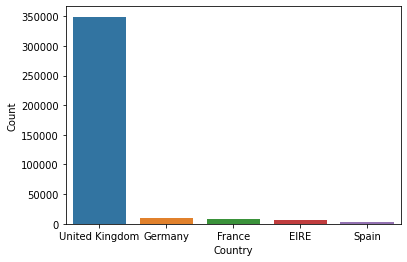

In [87]:
sns.barplot(x = 'Country', y = 'Count', data = top_countries.head(5))

This shows the top 5 countries by number of purchases. The United Kingdom is the dominant market, which may influence marketing and fulfillment decisions.


We extracted the day and month from the invoice date to see when people shop the most.

In [88]:
# create some new features from invoice date

retail['day'] = retail['InvoiceDate'].dt.day_name()
retail['month_name'] = retail['InvoiceDate'].dt.month_name()
retail['year'] = retail['InvoiceDate'].apply(lambda x: x.year)

In [89]:
top_productive_day = retail['day'].value_counts().reset_index()
top_productive_day.columns = ['Day name', 'Count']
top_productive_day

,Day name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


<AxesSubplot:xlabel='Day name', ylabel='Count'>

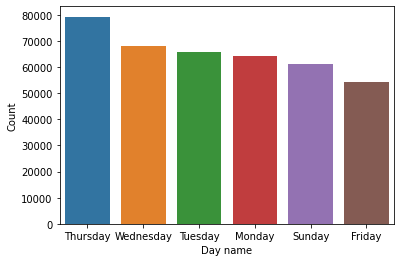

In [90]:
sns.barplot(x = 'Day name', y = 'Count' ,data = top_productive_day)

Sales are highest on Thursdays and mid-week overall. This insight could guide the timing of promotions or campaigns.


In [91]:
top_productive_month = retail['month_name'].value_counts().reset_index()
top_productive_month.columns = ['Month Name', 'Count']
top_productive_month

,Month Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


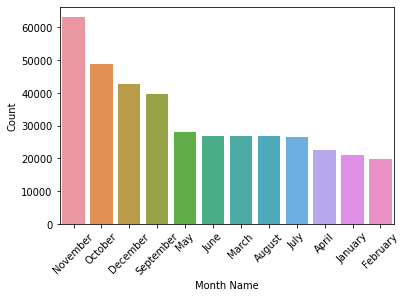

In [92]:
sns.barplot(x = 'Month Name', y = 'Count', data = top_productive_month)
plt.xticks(rotation=45)
plt.show()

Sales peak during November and October, likely due to holiday shopping. This suggests strong seasonal effects in customer activity.



**RFM Data Modeling :**

We’re using RFM (Recency, Frequency, Monetary) to understand customer behavior and group them based on how often and how much they buy.


Recency (R): How recently a customer made a purchase.

Frequency (F): How often a customer makes purchases.

Monetary (M): How much a customer spends.

In [94]:
#Getting the latest date
latest_date=retail['InvoiceDate'].max()

In [95]:
#calculating rfm metrics
rfm_metrics=retail.groupby('CustomerID').agg({'InvoiceDate':lambda x: (latest_date-x.max()).days\
                                              ,'InvoiceNo':'count',\
                                              'total_amt':'sum'}).reset_index()

rfm_metrics.columns=['CustomerID','recency','frequency','monetary']
rfm_metrics.head()

,CustomerID,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


Building RFM Segments. Giving recency, frequency, and monetary scores individually by dividing them into quartiles.
Combining three ratings to get a RFM segment 

In [96]:
# Finding quantiles for rfm metrics
quartiles=rfm_metrics[['recency','frequency','monetary']].quantile(q=[0.25,0.50,0.75]) #taking Q1,Q2,Q3 quartiles
quartiles

,recency,frequency,monetary
0.25,17.0,17.0,306.4825
0.50,50.0,41.0,668.5700
0.75,141.0,98.0,1660.5975


In [97]:
#creating rating functions for the metrics

def r_score(x): 
    if x<=quartiles.loc[0.25,'recency']:
        return 4
    elif x<=quartiles.loc[0.50,'recency']:
        return 3
    elif x<=quartiles.loc[0.75,'recency']:
        return 2
    else:
        return 1

def f_score(x):
    if x>= quartiles.loc[0.75,'frequency']:
        return 4
    elif x>= quartiles.loc[0.50,'frequency']:
        return 3
    elif x>= quartiles.loc[0.25,'frequency']:
        return 2
    else:
        return 1
    
def m_score(x): 
    if x>= quartiles.loc[0.75,'monetary']:
        return 4
    elif x>=quartiles.loc[0.50,'monetary']:
        return 3
    elif x>=quartiles.loc[0.25,'monetary']:
        return 2
    else:
        return 1

In [98]:
# Caclculating ratings
rfm_metrics['r_score']=rfm_metrics['recency'].apply(r_score)
rfm_metrics['f_score']=rfm_metrics['frequency'].apply(f_score)
rfm_metrics['m_score']=rfm_metrics['monetary'].apply(m_score)
rfm_metrics

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,1,182,4310.00,4,4,4
2,12348.0,74,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,309,17,334.40,1,2,2
...,...,...,...,...,...,...,...
4333,18280.0,277,10,180.60,1,1,1
4334,18281.0,180,7,80.82,1,1,1
4335,18282.0,7,12,178.05,4,1,1
4336,18283.0,3,721,2045.53,4,4,4


In [99]:
# Building RFM segment
rfm_metrics['RFM_segment']=rfm_metrics.r_score.astype(str)+rfm_metrics.f_score.astype(str)+rfm_metrics.m_score.astype(str)
rfm_metrics

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,RFM_segment
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,1,182,4310.00,4,4,4,444
2,12348.0,74,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,309,17,334.40,1,2,2,122
...,...,...,...,...,...,...,...,...
4333,18280.0,277,10,180.60,1,1,1,111
4334,18281.0,180,7,80.82,1,1,1,111
4335,18282.0,7,12,178.05,4,1,1,411
4336,18283.0,3,721,2045.53,4,4,4,444


In [100]:
#Adding all the scores to get an RFM score for each customer
rfm_metrics['RFM_score']=rfm_metrics.r_score+rfm_metrics.f_score+rfm_metrics.m_score
rfm_metrics

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,RFM_segment,RFM_score
0,12346.0,325,1,77183.60,1,1,4,114,6
1,12347.0,1,182,4310.00,4,4,4,444,12
2,12348.0,74,31,1797.24,2,2,4,224,8
3,12349.0,18,73,1757.55,3,3,4,334,10
4,12350.0,309,17,334.40,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,10,180.60,1,1,1,111,3
4334,18281.0,180,7,80.82,1,1,1,111,3
4335,18282.0,7,12,178.05,4,1,1,411,6
4336,18283.0,3,721,2045.53,4,4,4,444,12


In [101]:
#Creating customer segments based on rfm score
rfm_metrics['customer_segment']=0 # creating customer segment column
rfm_metrics.loc[(rfm_metrics.RFM_score>=3) & (rfm_metrics.RFM_score<=5),'customer_segment']='Churned customers'
rfm_metrics.loc[(rfm_metrics.RFM_score>=6) & (rfm_metrics.RFM_score<=8),'customer_segment']='MID level customers'
rfm_metrics.loc[(rfm_metrics.RFM_score>=9) & (rfm_metrics.RFM_score<=12),'customer_segment']='HIGH level customers'
rfm_metrics

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,RFM_segment,RFM_score,customer_segment
0,12346.0,325,1,77183.60,1,1,4,114,6,MID level customers
1,12347.0,1,182,4310.00,4,4,4,444,12,HIGH level customers
2,12348.0,74,31,1797.24,2,2,4,224,8,MID level customers
3,12349.0,18,73,1757.55,3,3,4,334,10,HIGH level customers
4,12350.0,309,17,334.40,1,2,2,122,5,Churned customers
...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,10,180.60,1,1,1,111,3,Churned customers
4334,18281.0,180,7,80.82,1,1,1,111,3,Churned customers
4335,18282.0,7,12,178.05,4,1,1,411,6,MID level customers
4336,18283.0,3,721,2045.53,4,4,4,444,12,HIGH level customers


Based on RFM scores, we divided customers into three groups — High-level, Mid-level, and Churned. This helps in targeting the right group with the right offers.

RFM_score: 3-5 => Churned customers

RFM_score: 6-8 => MID level customers

RFM_score: 9-12 => HIGH level customers

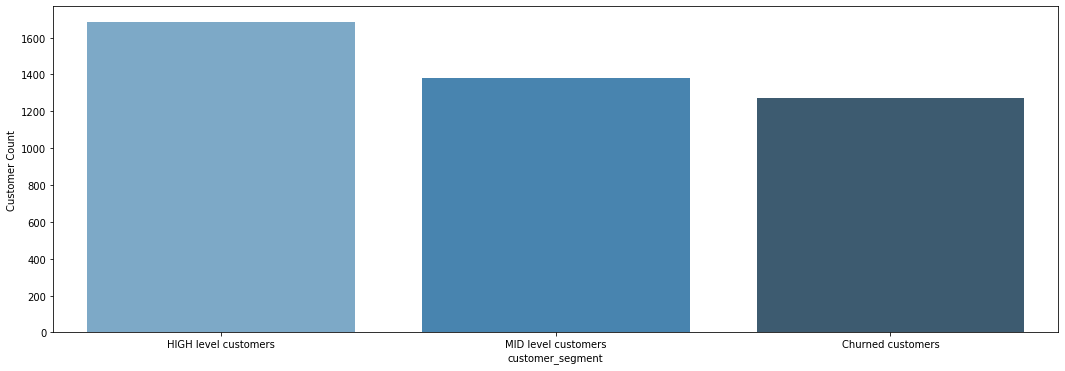

In [102]:
plt.figure(figsize=(18,6))
sns.barplot(x='customer_segment',y='CustomerID',data=rfm_metrics,estimator=np.count_nonzero,palette="Blues_d",\
            order=['HIGH level customers','MID level customers','Churned customers'])
plt.ylabel('Customer Count')
plt.show()

Total high level customers are:1686

Total mid level customers are:1381

Total churned customers are:1271

There is a possibility of getting the attention of the churned customers back if proper targetted marketing is performed

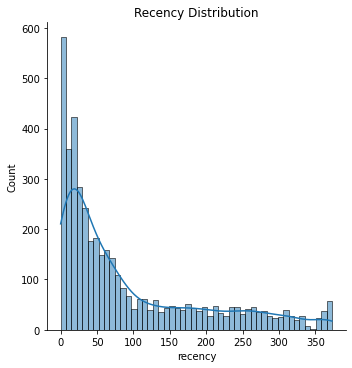

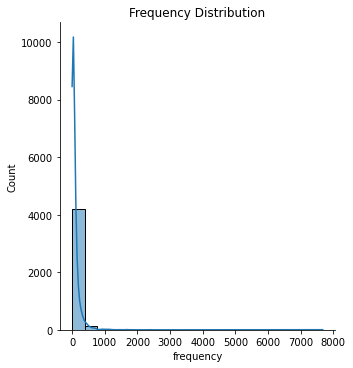

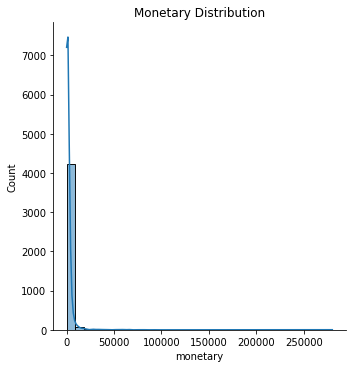

In [104]:
#Checking the distribution of the data

sns.displot(data=rfm_metrics,x='recency',kde=True,bins=50)
plt.title('Recency Distribution')
plt.show()

sns.displot(data=rfm_metrics,x='frequency',kde=True,bins=20)
plt.title('Frequency Distribution')
plt.show()

sns.displot(data=rfm_metrics,x='monetary',kde=True,bins=30)
plt.title('Monetary Distribution')
plt.show()

The RFM data was skewed, so we used log transformation to make the values more balanced for better clustering.


In [105]:
log_trans_data = np.log1p(rfm_metrics[['recency', 'frequency', 'monetary']]).round(2)

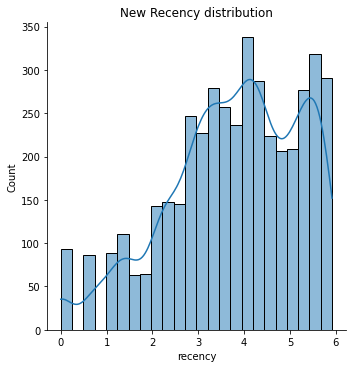

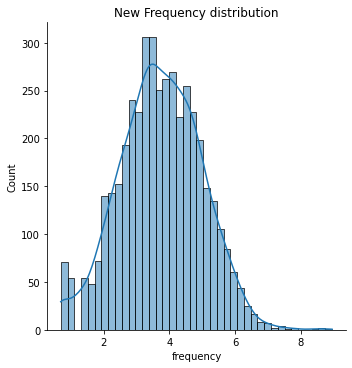

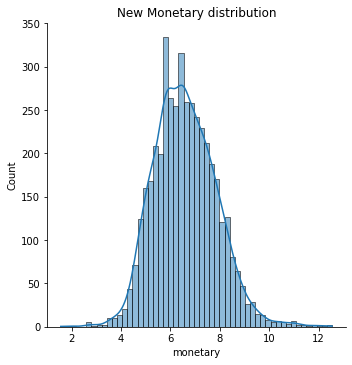

In [106]:
#Checking the distribution of the data again
sns.displot(data=log_trans_data,x='recency',kde=True)
plt.title('New Recency distribution')
plt.show()
sns.displot(data=log_trans_data,x='frequency',kde=True)
plt.title('New Frequency distribution')
plt.show()
sns.displot(data=log_trans_data,x='monetary',kde=True)
plt.title('New Monetary distribution')
plt.show()

In [107]:
#Standardizing the data
ss=StandardScaler()
rfm_metrics_scaled=ss.fit_transform(log_trans_data)
rfm_metrics_scaled=pd.DataFrame(data=rfm_metrics_scaled,columns=log_trans_data.columns,index=log_trans_data.index)
rfm_metrics_scaled

,recency,frequency,monetary
0,1.412239,-2.440827,3.704414
1,-2.148821,1.189668,1.415690
2,0.385816,-0.207912,0.716358
3,-0.577765,0.458750,0.700464
4,1.377327,-0.673772,-0.610783
...,...,...,...
4333,1.300520,-1.067343,-1.103495
4334,1.000273,-1.324370,-1.739251
4335,-1.178257,-0.938830,-1.111442
4336,-1.660048,2.290062,0.819669
